In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#### Выбираю датасет титаник

In [2]:
dataset=pd.read_csv('dataset.csv')

Выводим первые строки

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Выводим информацию и описание датасета

In [4]:
dataset.shape

(891, 12)

Выводим информацию и описание датасета

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


######  Смотрим частотности некотрых столбцов


In [7]:
#сколько выжило , сколько умерло
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#смотрим частотность каждого класса в карабле 
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
#смотрим частотность полов
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
#частотность возрастов пассажиров
dataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
dataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
dataset['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
dataset['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [14]:
dataset['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
C7             1
C111           1
B73            1
A16            1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Описание столбцов датасата
- Passengerid - это id пассажира.
- Survived - столбец, говорит о том выжил ли пассажир,  принимает значение 0 или 1 . 1 если выжил , 0 если нет. Является целивой перменной, которую будем предсказывать. Только 342 человека выжило 
- Pclass - фича, говорящая о том ,к какому классу в корабле относится пассажир. Может принимать значения 1,2,3. В основном люди 3 класса
- Name- имя пассажира.
- Sex - пол пассажира. Мужчин больше чем женщин
- Age - возраст пассажира. 5 самых распрастараненных возрастов 24, 22, 18, 18 , 30. В этом столбце есть пропуски.
- SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры).Пропусков нет. Большинство       пассажиров не имеют родственников. 209 имеют только одного родственника
- Parch-содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети). У большинства людей нет на       борту родственников первого порядка
- Ticket- код билета пассажира
- Fare - цена билета. Пропусков в данных нету. 5 самые частые цен на билет 8.0500, 3.0000, 7.8958, 7.7500, 26.0000.
- Cabin- вид каюты пассажира. Пропусков данных очень много, порядка 77%.
- Embarked- порт посадки. Есть немного пропусков. Возможные значения S,C,Q, где C — Cherbourg, Q — Queenstown, S — Southampton.


### Выводы из первичного анализа данных
- Passengerid удаляем, потому что у датасета и так есть индексы, а id пассажира не дает нам никакой дополнительной полезной информации
- Name удаляем. Т к это категориальная переменная , где количество категорий  равно количеству пассажиров. Бесполезная фича
- Sex принимает значения male и female. их Мы переведем в такой вид. male -1 , female-0
- Age в пропусках заполним через среднее.
- Ticket удаляем , по той же причине, что и Name
- Cabin может быть преобразована в логическое значение
- Embarked - порт посадки пропуски заполню через самое часто встречаемое значение.


##### Преобразования признаков

In [16]:
#удаляем PassengerId, Name, Ticket
dataset=dataset.drop(['PassengerId','Name','Ticket'],axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
#функция преобразующая пол 
def priobr_sex(sex):
    if sex=='male':
        return 1
    elif sex=='female':
        return 0
    
dataset['Sex'] = dataset['Sex'].apply(priobr_sex)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [18]:
#Заполняем возраст через среднее
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())


In [19]:
#приобразуем Cabin
dataset['Cabin'] =dataset['Cabin'].fillna(0)
dataset['Cabin'][dataset['Cabin']!=0] = 1
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,1,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,1,S
4,0,3,1,35.0,0,0,8.0500,0,S


In [20]:
#фунция приобразующая S,C,Q в 0,1,2
def priobr_cabin(cabin):
    if cabin == 'S':
        return 0
    elif cabin == 'C':
        return 1
    elif cabin == 'Q':
        return 2
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset['Embarked'] = dataset['Embarked'].apply(priobr_cabin)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,0
4,0,3,1,35.0,0,0,8.0500,0,0


##### Визуализации

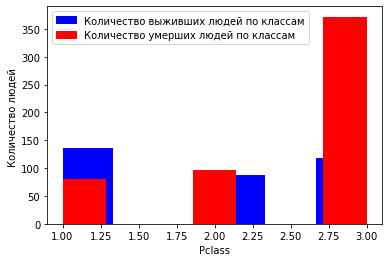

In [21]:
#Визуализация выживших и умерших по соц. положению
plt.xlabel('Pclass')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['Survived']==1]['Pclass'], bins=6,color='blue')
plt.hist(x=dataset[dataset['Survived']==0]['Pclass'], bins=7,color='red')
life = mpatches.Patch(color='blue', label='Количество выживших людей по классам')
unlife = mpatches.Patch(color='red', label='Количество умерших людей по классам')
plt.legend(handles=[life,unlife])

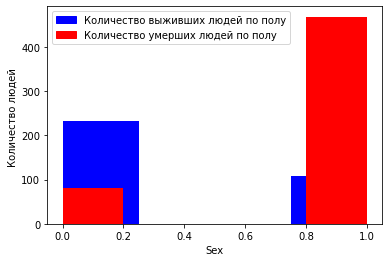

In [22]:
#Распределение выживших и у умерших по полу
plt.xlabel('Sex')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['Survived']==1]['Sex'], bins=4,color='blue')
plt.hist(x=dataset[dataset['Survived']==0]['Sex'], bins=5,color='red')
life = mpatches.Patch(color='blue', label='Количество выживших людей по полу')
unlife = mpatches.Patch(color='red', label='Количество умерших людей по полу')
plt.legend(handles=[life,unlife])

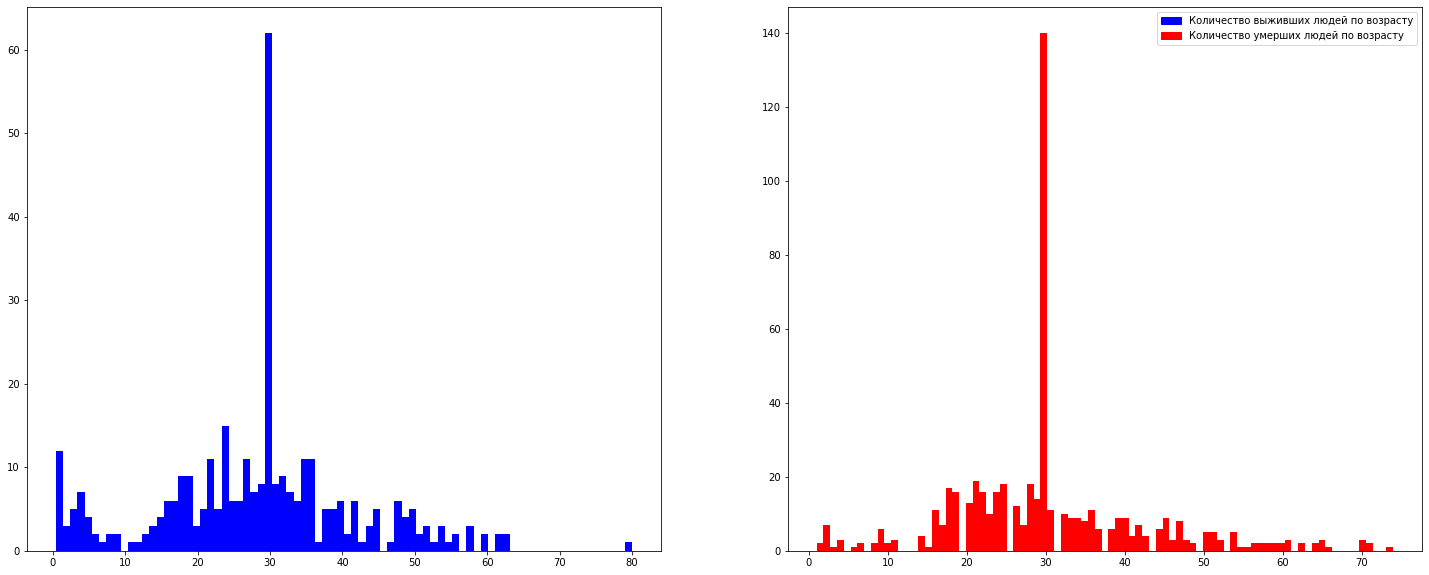

In [23]:
#Распределение выживших и у умерших по возрастам
fig = plt.figure(figsize=(25,10))
plt.xlabel('Age')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['Survived']==1]['Age'], bins=80,color='blue')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['Survived']==0]['Age'], bins=85,color='red')
life = mpatches.Patch(color='blue', label='Количество выживших людей по возрасту')
unlife = mpatches.Patch(color='red', label='Количество умерших людей по возрасту')
plt.legend(handles=[life,unlife])

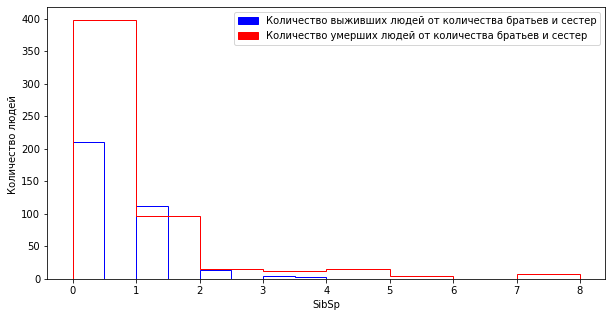

In [24]:
# Распределение выживших и умерших от количества братьев и сестер
fig = plt.figure(figsize=(10,5))
plt.xlabel('SibSp')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['Survived']==1]['SibSp'], bins=8,color='blue',histtype='step')
plt.hist(x=dataset[dataset['Survived']==0]['SibSp'], bins=8,color='red',histtype='step')
life = mpatches.Patch(color='blue', label='Количество выживших людей от количества братьев и сестер')
unlife = mpatches.Patch(color='red', label='Количество умерших людей от количества братьев и сестер')
plt.legend(handles=[life,unlife])

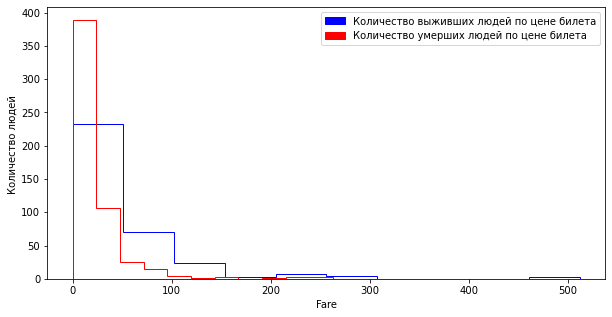

In [25]:
# Распределение выживших и умерших по цене билета Fare
fig = plt.figure(figsize=(10,5))
plt.xlabel('Fare')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['Survived']==1]['Fare'], bins=10,color='blue',histtype='step')
plt.hist(x=dataset[dataset['Survived']==0]['Fare'], bins=11,color='red',histtype='step')
life = mpatches.Patch(color='blue', label='Количество выживших людей по цене билета')
unlife = mpatches.Patch(color='red', label='Количество умерших людей по цене билета')
plt.legend(handles=[life,unlife])

## Выводы по визуализации 
- По первому графику можно сделать вывод, что люди из 3-ого класса умирают чаше всех остальных. Выживают же чаще всех люди из первого класса. Люди из второго класса могут с примерно равной вероятностью выжить или умереть
- По второму графику можно сделать вывод,что мужчины значительно чаще умирали на титанике чем женщины.При том женщины выживали примерно в 2 раза чаще чем умирали 
- По третьему графику можно сделать вывод, что количество выживших и умерших людей примерно 30 лет больше всех остальных.
- По четвертому графику можно сделать вывод, что если у пассижира нету братьв или сестер, то он с большей вероятностью погибнет
- По пятому графику можно сделать вывод,что больше всех умирают люди с билетами до примерно 100 долларов. Также можно сказать, что люди чья стоимость билетов находится около 500 долларов не умирают.

#### Метрика
#### Выбрал accuracy, потому что решаю задачу классификации

In [26]:
def Accuracy(pred, Y_test):
    
    
    return (pred==Y_test).mean()

#### Класс для логистической регрессии
#### Реализовал l1 регуляризацию

In [27]:
#Я реализовал логистическую регрессию в виде класса с 2 публичными методами. fit - для обучения, predict - для предсказания
class LogReg:
    #задаем количество итераций при инициализации класса 100000
    # l1 регуляризацию = 0
    def __init__(self,num_iter = 10000, alpha=0):
        self.num_iter=num_iter
        self.beta=1
        self.alpha = alpha
        
     #метод обучающий модель   
    def fit(self,x,y):
        #задаем матрицу весов в виде единичной матрицы 
        self.beta = np.ones(x.shape[1])
        for i in range(self.num_iter):
            h = self._sigmoid(x, self.beta)#считаем сигмойду
            gradient = self._gradient_spusk(x, h, y)#спускаемся по градиенту
            
            self.beta =self._weight_update(self.beta, 0.1, gradient)#обновляем веса
    
    #приватный метод, считающий сигмойду
    def _sigmoid(self,X, weight):
        z = np.dot(X, weight).astype('float64')
        return 1 / (1 + np.exp(-z))
    
    #приватная функция для градиентного шага 
    def _gradient_spusk(self,X, H, Y):
        return np.dot(X.T, (H - Y)) / Y.shape[0]
    
    
    #приватная функция для обноления весов с л2 регуляризацией
    def _weight_update(self,weight, learning_rate, gradient):
        return weight - learning_rate * gradient + self.alpha * sum(gradient**2)
    
    
    def predict(self,test):
        final_result=[]
        
        #приминяем сигмойду к тестовым данным
        result = self._sigmoid(test, self.beta)
        
        #выбираем  метки для теста 
        for i in result:
            final_result.append(self._onepred(i))
        
        
        return final_result
        
        
        
    #приватная функция для одного предсказания    
    def _onepred(self,x):
        if x < 0.5:
            return 0
        else:
            return 1

#### Создание выборок 

In [28]:
def my_train_test_split(dataset,prosent=0.15):
    indexes = list(dataset.index)
    
    test_ind = list(np.random.choice(indexes, int(prosent*len(indexes))))
    train_ind = list(set(indexes) - set(test_ind))
    test_dataset = dataset.loc[test_ind]
    train_dataset = dataset.loc[train_ind]
    
    y_train, X_train ,y_test, X_test = train_dataset['Survived'].to_numpy(),\
                                        train_dataset.drop(['Survived'],axis=1).to_numpy(),\
                                        test_dataset['Survived'].to_numpy(), \
                                        test_dataset.drop(['Survived'],axis=1).to_numpy(),
    
    
    return X_train, y_train , X_test, y_test 
    

In [29]:
X_train, y_train , X_test, y_test  = my_train_test_split(dataset)

##### Обучения моделей 

In [30]:

#обучаю свою модель без регуляризацию
my_lg=LogReg()
my_lg.fit(X_train,y_train)
print(f'Accuracy на обучающей выборки = {Accuracy(my_lg.predict(X_train),y_train)}')
print(f'Accuracy на тестовой выборки = {Accuracy(my_lg.predict(X_test),y_test)}')


Accuracy на обучающей выборки = 0.7626459143968871
Accuracy на тестовой выборки = 0.7518796992481203


In [31]:
#обучаю модель из sklearn без регуляризацию
sk_lg=sklearn.linear_model.LogisticRegression( max_iter=10000)
sk_lg.fit(X_train,y_train)
print(f'Accuracy на обучающей выборки = {Accuracy(sk_lg.predict(X_train),y_train)}')
print(f'Accuracy на тестовой выборки = {Accuracy(sk_lg.predict(X_test),y_test)}')

Accuracy на обучающей выборки = 0.8028534370946823
Accuracy на тестовой выборки = 0.7744360902255639


In [44]:

#обучаю свою модель c регуляризацией 0.00001
my_lg=LogReg(alpha=0.00001)
my_lg.fit(X_train,y_train)
print(f'Accuracy на обучающей выборки = {Accuracy(my_lg.predict(X_train),y_train)}')
print(f'Accuracy на тестовой выборки = {Accuracy(my_lg.predict(X_test),y_test)}')


Accuracy на обучающей выборки = 0.7691309987029832
Accuracy на тестовой выборки = 0.7744360902255639


In [45]:
#обучаю модель из sklearn c регуляризацией 0.00001
sk_lg=sklearn.linear_model.LogisticRegression( max_iter=10000, penalty='l2',C=100000)
sk_lg.fit(X_train,y_train)
print(f'Accuracy на обучающей выборки = {Accuracy(sk_lg.predict(X_train),y_train)}')
print(f'Accuracy на тестовой выборки = {Accuracy(sk_lg.predict(X_test),y_test)}')

Accuracy на обучающей выборки = 0.808041504539559
Accuracy на тестовой выборки = 0.7669172932330827


## Выводы о моделях по точности
- Модель из sklearn показала чуть лучшие точность на обучающей выборке чем моя 
- На тестовой выборке моя модель с регуляризацией показала точность выше чем модель из sklearn
